# Парадокс Байеса: независимые медицинские тесты

Доля больных некоторым заболеванием равна $\mathbf{0.01}$. Если человек болен, то тест дает положительный результат с вероятностью $\mathbf{0.9}$. Если человек здоров, то тест дает ложноположительный результат с вероятностью $\mathbf{0.1}$.

Предположим, человек прошел $\mathbf{p}$ медицинских тестов, и все показали положительный результат. Какова вероятность, что он действительно болен?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')

In [3]:
p = int(input('Количество проведённых тестов -> '))

Количество проведённых тестов -> 10


На лекции мы получили формулу: $\displaystyle \operatorname{Pr}[{W\mid P}] = \dfrac{\operatorname{Pr}[P\mid W]\operatorname{Pr}[W]}{\operatorname{Pr}[P\mid W]\operatorname{Pr}[W]+\operatorname{Pr}[P\mid H]\operatorname{Pr}[H]}.$

Обозначим за $T_p$ — «ровно $p$ тестов оказались положительными».


Тогда $\displaystyle \operatorname{Pr}[{W\mid T_p}] = \dfrac{\operatorname{Pr}[T_p\mid W]\operatorname{Pr}[W]}{\operatorname{Pr}[T_p\mid W]\operatorname{Pr}[W]+\operatorname{Pr}[T_p\mid H]\operatorname{Pr}[H]}.$

Вероятности $\operatorname{Pr}[W]$ и $\operatorname{Pr}[H]$ нам известны. Осталось найти только $\operatorname{Pr}[T_p\mid W]$ и $\operatorname{Pr}[T_p\mid H]$.

Это совсем несложно: $\operatorname{Pr}[T_p\mid W]=0.9^p$, $\quad \operatorname{Pr}[T_p\mid H]=0.1^p.$

In [4]:
tests = np.empty(p + 1)

for i in range(p + 1):
    tests[i] = (0.9 ** i * 0.01 / (0.9 ** i * 0.01 + 0.1 ** i * 0.99))

print(tests)

[0.01       0.08333333 0.45       0.88043478 0.98513514 0.99832623
 0.99981375 0.9999793  0.9999977  0.99999974 0.99999997]


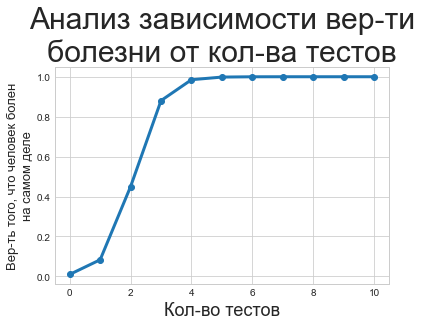


 [0.01       0.08333333 0.45       0.88043478 0.98513514 0.99832623
 0.99981375 0.9999793  0.9999977  0.99999974 0.99999997]


In [5]:
plt.plot(range(0, p + 1), tests, 'o-', linewidth = 3)
plt.xlabel('Кол-во тестов', size = 18)
plt.ylabel('Вер-ть того, что человек болен\nна самом деле', size = 13)
plt.title('Анализ зависимости вер-ти\nболезни от кол-ва тестов', size = 30)
plt.show()

print ('\n', tests)

Пусть теперь человек прошел $p + n$ медицинских тестов, из которых $p$ были положительными, а $n$ – отрицательными. Какова вероятность, что он действительно болен?

In [6]:
def illness_prob(p, n):
    return (0.9 ** p * 0.1 ** n * 0.01 / (0.9 ** p * 0.1 ** n * 0.01 + 0.1 ** p * 0.9 ** n * 0.99))

In [7]:
illness_prob(4, 2)

0.45000000000000007

In [8]:
illness_prob(5, 1)

0.9851351351351352

In [9]:
illness_prob(1, 1)

0.01

In [10]:
illness_prob(1, 2)

0.0011210762331838567

In [11]:
illness_prob(1, 3)

0.00012468827930174568